In [49]:
import numpy as np
import pandas as pd

np.random.seed(23) 

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = pd.concat([df,df1],ignore_index=True)

df = df.sample(40)

new = df['target'].values

In [37]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [38]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [39]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [40]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [41]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [42]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [43]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

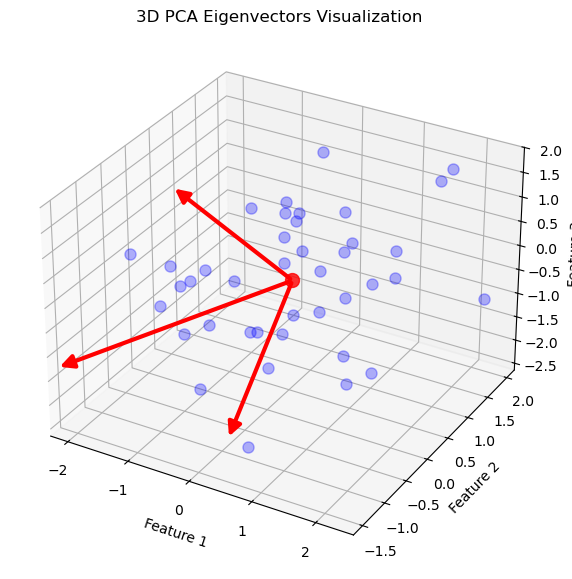

In [44]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib.patches import FancyArrowPatch

# --- Fixed Arrow3D class for Matplotlib >=3.8 ---
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, ax, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs
        self._ax = ax  # store reference to axes

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        # ✅ Use ax.get_proj() instead of renderer.M
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self._ax.get_proj())
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self._ax.get_proj())
        return np.mean(zs)


# -----------------------------------------------------------------
# Example dataset
np.random.seed(0)
df = pd.DataFrame(np.random.randn(40, 3), columns=['feature1', 'feature2', 'feature3'])

# Compute covariance and eigenvectors
cov_matrix = np.cov(df[['feature1', 'feature2', 'feature3']].T)
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# -----------------------------------------------------------------
# Plot 3D scatter and PCA directions
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.3)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()],
        'o', markersize=10, color='red', alpha=0.8)

# Scale eigenvectors by eigenvalues for visibility
scale = 3
for val, vec in zip(eigen_values, eigen_vectors.T):
    a = Arrow3D(
        [df['feature1'].mean(), df['feature1'].mean() + scale * val * vec[0]],
        [df['feature2'].mean(), df['feature2'].mean() + scale * val * vec[1]],
        [df['feature3'].mean(), df['feature3'].mean() + scale * val * vec[2]],
        ax=ax, mutation_scale=20, lw=3, arrowstyle="-|>", color="r"
    )
    ax.add_artist(a)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D PCA Eigenvectors Visualization')

plt.show()


In [45]:
pc = eigen_vectors[0:2]
pc

array([[-0.7936816 , -0.50396011,  0.3407253 ],
       [-0.19191689, -0.32406312, -0.9263644 ]])

In [51]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = new
new_df.head()

,PC1,PC2,target
0,0.414461,1.663938,1
1,0.578796,-0.976353,0
2,-0.565582,-0.148043,1
3,-1.517742,0.429131,1
4,2.121633,-0.128194,1


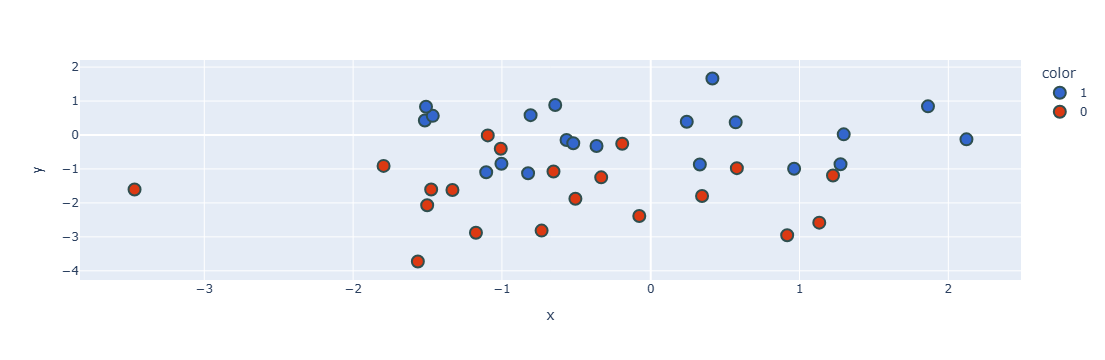

In [53]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()